### OGTIP Oeson - Data Science Internship
# Project 3&4

## Project Description

- Perform a detailed EDA on student dataset.
- Perform efficient machine learning models on the training dataset.
- Plot charts to bring out necessary information from the dataset.
- State inference with a relevant statement.

#### Import necessary libraries

In [399]:
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelBinarizer

# Plots
import seaborn as sns
import matplotlib.pyplot as plt


# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

#Metrics calculation 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import auc, roc_auc_score

#### Connect to data

In [2]:
data = pd.read_csv("Student_academic.csv")
org_shape = data.shape
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Perform EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

#### Descriptive Statistics

In [4]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


#### Checking Missing Values

In [5]:
total = data.isnull().sum()

percent_2 = data.isnull().sum() / len(data) * 100

missing_data = pd.concat([total, round(percent_2, 2)], axis=1, keys=['Total', '%']).sort_values(["Total"], ascending=False)
missing_data.head(5)

,Total,%
Marital status,0,0.0
Curricular units 2nd sem (enrolled),0,0.0
Curricular units 1st sem (enrolled),0,0.0
Curricular units 1st sem (evaluations),0,0.0
Curricular units 1st sem (approved),0,0.0


No missing data

#### Convert categorical labels to numericals

In [6]:
le = LabelEncoder()
data["Target"] = le.fit_transform(data["Target"])

In [360]:
labels = pd.Series(le.classes_)
pd.DataFrame(labels)

,0
0,Dropout
1,Enrolled
2,Graduate


#### Finding Outliners

##### Boxplot of features

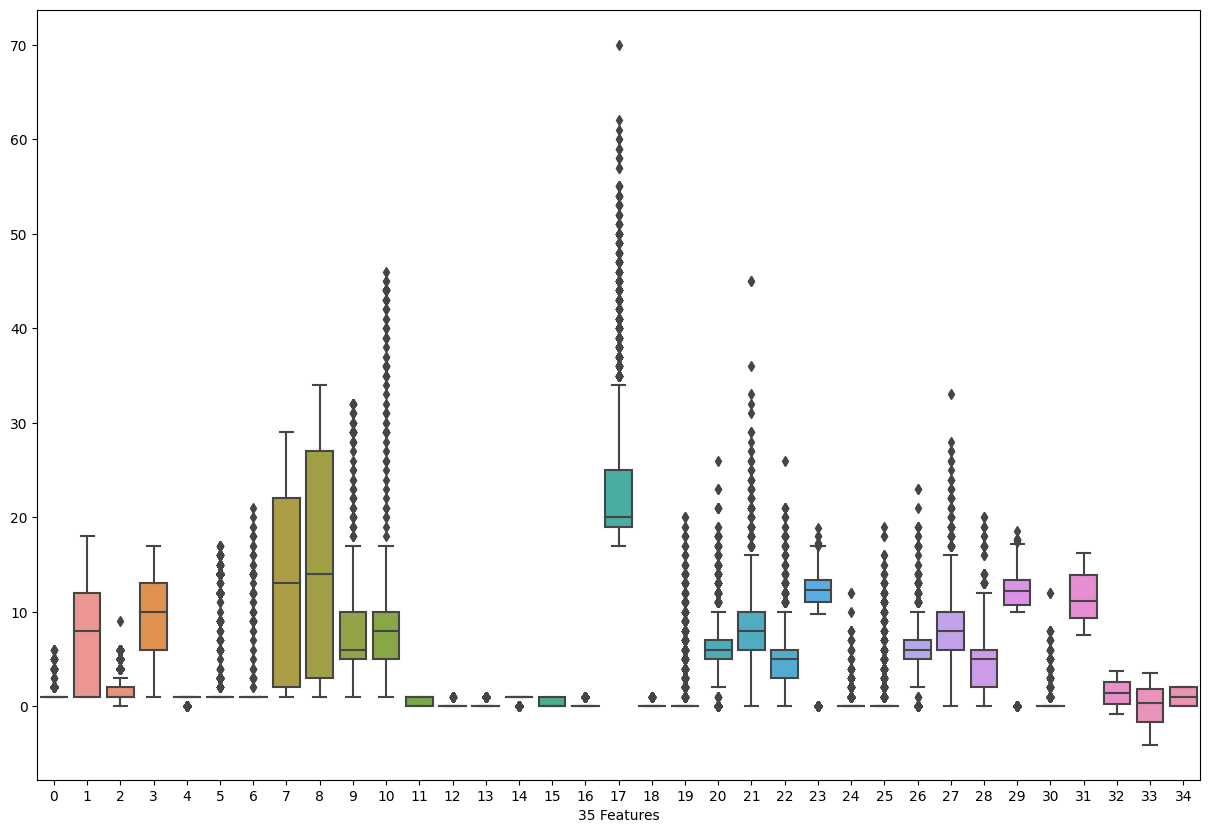

In [8]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data).set(xticklabels=list(range(35)), xlabel="35 Features")
plt.show()

##### Eliminate outliners

In [9]:
#Using IQR for finding outliers
outlines_list = [2, 17, 20, 21, 22, 27]
outlines_data = data.iloc[:, outlines_list]

Q1 = outlines_data.quantile(0.05)
Q3 = outlines_data.quantile(0.92)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

#Removing outlier
data = data[((outlines_data > lower_limit) & (outlines_data < upper_limit)).all(axis=1)]

print("Number of eliminated outliners: ", (org_shape[0] - data.shape[0]))
print("Data shape after outliners elimination: ", data.shape)

Number of eliminated outliners:  108
Data shape after outliners elimination:  (4316, 35)


##### Boxplot of features (after outliners elimination)

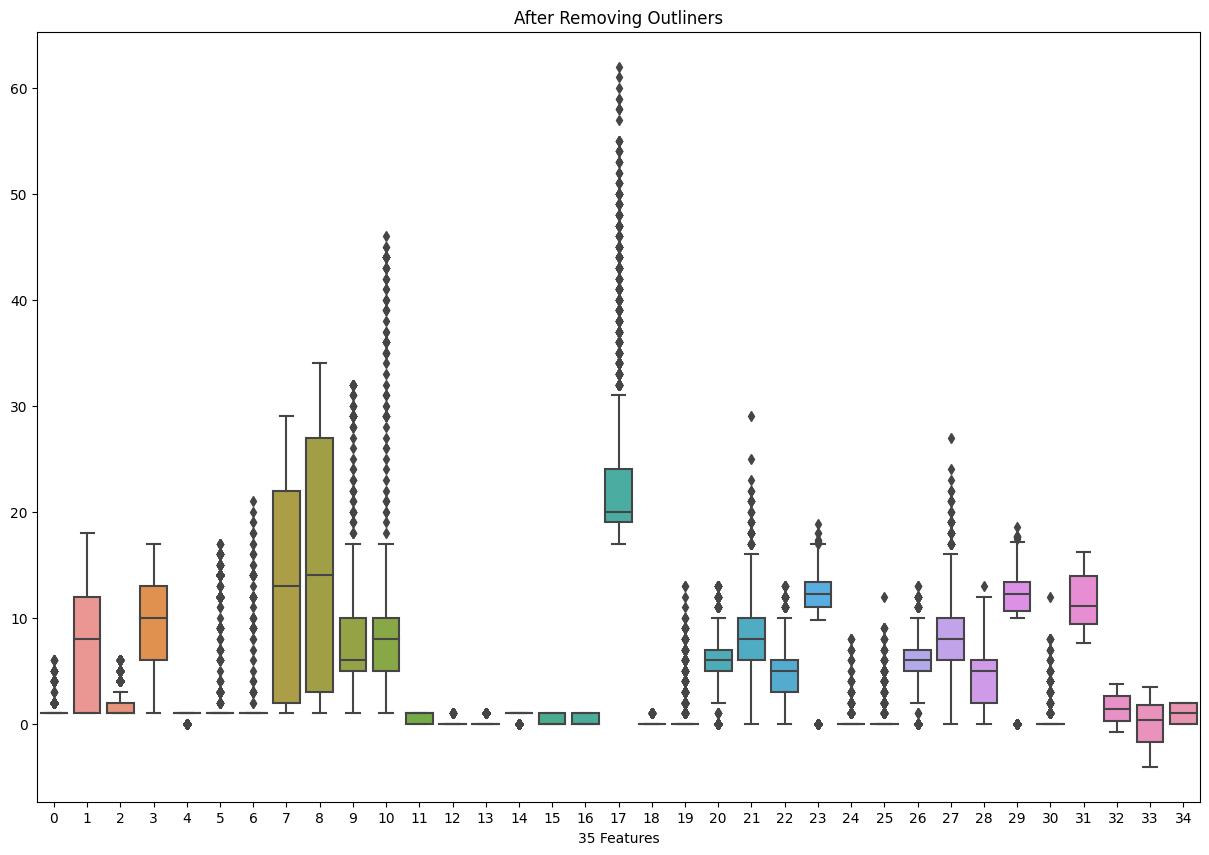

In [10]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data).set(xticklabels=list(range(35)), xlabel="35 Features", title="After Removing Outliners")
plt.show()

#### Get features and labels seperately

In [11]:
X=data.drop("Target", axis=1)
y=data["Target"]

#### Standardization

In [12]:
standard_scaler = StandardScaler()
X=standard_scaler.fit_transform(X)

#### Perform PCA

##### Choosing k for PCA

In [13]:
# Compute covarience matrix
cov_matrix = np.cov(X)

# Perform Singular Value Decomposition
U, s, Vh = np.linalg.svd(cov_matrix)

# Find effective k
k = np.argmax(s.cumsum() / s.sum() >= 0.99) + 1

print("k = ", k)

k =  29


#### Apply PCA method

In [14]:
pca = PCA(n_components=k)
X = pca.fit_transform(X)

#### Split data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Modeling

### Logistic Regression

In [16]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

acc_log_reg_train = round(log_reg.score(X_train, y_train) * 100, 2)
acc_log_reg_test = round(log_reg.score(X_test, y_test) * 100, 2)

print("Train Set Accuracy:", acc_log_reg_train)
print("Test Set Accuracy", acc_log_reg_test)

Train Set Accuracy: 77.26
Test Set Accuracy 73.73


#### Confusion Matrix

In [249]:
y_pred = log_reg.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[199,  31,  36],
       [ 35,  47,  67],
       [ 23,  35, 391]], dtype=int64)

#### Classification Metrics

In [18]:
report = pd.DataFrame(metrics.classification_report(y_test, y_pred, output_dict=True)).transpose()
display(round(report, 3))

,precision,recall,f1-score,support
0,0.774,0.748,0.761,266.000
1,0.416,0.315,0.359,149.000
2,0.791,0.871,0.829,449.000
accuracy,0.737,0.737,0.737,0.737
macro avg,0.661,0.645,0.650,864.000
weighted avg,0.721,0.737,0.727,864.000


### Decision Tree

In [19]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

acc_decision_tree_train = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree_test = round(decision_tree.score(X_test, y_test) * 100, 2)

print("Train Set Accuracy:", acc_decision_tree_train)
print("Test Set Accuracy", acc_decision_tree_test)

Train Set Accuracy: 100.0
Test Set Accuracy 63.77


#### Confusion Matrix

In [20]:
y_pred = decision_tree.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[176,  47,  43],
       [ 39,  44,  66],
       [ 52,  66, 331]], dtype=int64)

#### Classification Metrics

In [21]:
report = pd.DataFrame(metrics.classification_report(y_test, y_pred, output_dict=True)).transpose()
display(round(report, 3))

,precision,recall,f1-score,support
0,0.659,0.662,0.660,266.000
1,0.280,0.295,0.288,149.000
2,0.752,0.737,0.745,449.000
accuracy,0.638,0.638,0.638,0.638
macro avg,0.564,0.565,0.564,864.000
weighted avg,0.642,0.638,0.640,864.000


### SVC

In [182]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)

acc_svc_train = round(svc.score(X_train, y_train) * 100, 2)
acc_svc_test = round(svc.score(X_test, y_test) * 100, 2)

print("Train Set Accuracy:", acc_svc_train)
print("Test Set Accuracy", acc_svc_test)

Train Set Accuracy: 83.66
Test Set Accuracy 73.84


#### Confusion Matrix

In [183]:
y_pred = svc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[193,  31,  42],
       [ 32,  49,  68],
       [ 20,  33, 396]], dtype=int64)

#### Classification Metrics

In [184]:
report = pd.DataFrame(metrics.classification_report(y_test, y_pred, output_dict=True)).transpose()
display(round(report, 3))

,precision,recall,f1-score,support
0,0.788,0.726,0.755,266.000
1,0.434,0.329,0.374,149.000
2,0.783,0.882,0.829,449.000
accuracy,0.738,0.738,0.738,0.738
macro avg,0.668,0.645,0.653,864.000
weighted avg,0.724,0.738,0.728,864.000


### Gaussian Naive Bayes

In [25]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

acc_gaussian_train = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian_test = round(gaussian.score(X_test, y_test) * 100, 2)

print("Train Set Accuracy:", acc_gaussian_train)
print("Test Set Accuracy", acc_gaussian_test)

Train Set Accuracy: 66.63
Test Set Accuracy 65.39


#### Confusion Matrix

In [26]:
y_pred = gaussian.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[183,  25,  58],
       [ 42,  21,  86],
       [ 52,  36, 361]], dtype=int64)

#### Classification Metrics

In [27]:
report = pd.DataFrame(metrics.classification_report(y_test, y_pred, output_dict=True)).transpose()
display(round(report, 3))

,precision,recall,f1-score,support
0,0.661,0.688,0.674,266.000
1,0.256,0.141,0.182,149.000
2,0.715,0.804,0.757,449.000
accuracy,0.654,0.654,0.654,0.654
macro avg,0.544,0.544,0.538,864.000
weighted avg,0.619,0.654,0.632,864.000


### KNN

In [28]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

acc_knn_train = round(knn.score(X_train, y_train) * 100, 2)
acc_knn_test = round(knn.score(X_test, y_test) * 100, 2)

print("Train Set Accuracy:", acc_knn_train)
print("Test Set Accuracy", acc_knn_test)

Train Set Accuracy: 75.96
Test Set Accuracy 71.18


#### Confusion Matrix

In [29]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[171,  26,  69],
       [ 27,  28,  94],
       [ 15,  18, 416]], dtype=int64)

#### Classification Metrics

In [30]:
report = pd.DataFrame(metrics.classification_report(y_test, y_pred, output_dict=True)).transpose()
display(round(report, 3))

,precision,recall,f1-score,support
0,0.803,0.643,0.714,266.000
1,0.389,0.188,0.253,149.000
2,0.718,0.927,0.809,449.000
accuracy,0.712,0.712,0.712,0.712
macro avg,0.637,0.586,0.592,864.000
weighted avg,0.688,0.712,0.684,864.000


### Random Forest

In [31]:
#Hyperparameters n_estimator with 100, random_state starting with 0 to 100
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(X_train, y_train)

acc_random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest_test = round(random_forest.score(X_test, y_test) * 100, 2)

print("Train Set Accuracy:", acc_random_forest_train)
print("Test Set Accuracy", acc_random_forest_test)

Train Set Accuracy: 100.0
Test Set Accuracy 73.84


#### Confusion Matrix

In [32]:
y_pred = random_forest.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[203,  15,  48],
       [ 42,  28,  79],
       [ 24,  18, 407]], dtype=int64)

#### Classification Metrics

In [33]:
report = pd.DataFrame(metrics.classification_report(y_test, y_pred, output_dict=True)).transpose()
display(round(report, 3))

,precision,recall,f1-score,support
0,0.755,0.763,0.759,266.000
1,0.459,0.188,0.267,149.000
2,0.762,0.906,0.828,449.000
accuracy,0.738,0.738,0.738,0.738
macro avg,0.659,0.619,0.618,864.000
weighted avg,0.708,0.738,0.710,864.000


### Gradient Boosting Classifier

In [52]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gbc.fit(X_train, y_train)

acc_gbc_train = round(gbc.score(X_train, y_train) * 100, 2)
acc_gbc_test = round(gbc.score(X_test, y_test) * 100, 2)

print("Train Set Accuracy:", acc_gbc_train)
print("Test Set Accuracy", acc_gbc_test)

Train Set Accuracy: 86.56
Test Set Accuracy 74.07


#### Confusion Matrix

In [246]:
y_pred = gbc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[198,  27,  41],
       [ 33,  41,  75],
       [ 20,  28, 401]], dtype=int64)

#### Classification Metrics

In [54]:
report = pd.DataFrame(metrics.classification_report(y_test, y_pred, output_dict=True)).transpose()
display(round(report, 3))

,precision,recall,f1-score,support
0,0.789,0.744,0.766,266.000
1,0.427,0.275,0.335,149.000
2,0.776,0.893,0.830,449.000
accuracy,0.741,0.741,0.741,0.741
macro avg,0.664,0.638,0.644,864.000
weighted avg,0.720,0.741,0.725,864.000


### Artificial Neuron Network (TensorFlow) 

In [493]:
ann = models.Sequential([
        layers.Flatten(input_shape=(X_train.shape[1], 1)),
        layers.Dense(1000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(3, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
108/108 [==============================] - 1s 6ms/step - loss: 0.8613 - accuracy: 0.6738
Epoch 2/5
108/108 [==============================] - 1s 5ms/step - loss: 0.6946 - accuracy: 0.7257
Epoch 3/5
108/108 [==============================] - 1s 5ms/step - loss: 0.6325 - accuracy: 0.7512
Epoch 4/5
108/108 [==============================] - 1s 5ms/step - loss: 0.5990 - accuracy: 0.7648
Epoch 5/5
108/108 [==============================] - 1s 5ms/step - loss: 0.5782 - accuracy: 0.7767


In [494]:
acc_ann_train = round(ann.evaluate(X_train,  y_train, verbose=2)[1] * 100, 2)
acc_ann_test = round(ann.evaluate(X_test,  y_test, verbose=2)[1] * 100, 2)

print("Train Set Accuracy:", acc_ann_train)
print("Test Set Accuracy", acc_ann_test)

108/108 - 0s - loss: 0.5653 - accuracy: 0.7813 - 384ms/epoch - 4ms/step
27/27 - 0s - loss: 0.6385 - accuracy: 0.7488 - 88ms/epoch - 3ms/step
Train Set Accuracy: 78.13
Test Set Accuracy 74.88


#### Confusion Matrix

In [495]:
y_pred = np.argmax(ann(X_test), axis=1)
confusion_matrix(y_test, y_pred)

array([[204,  19,  43],
       [ 38,  30,  81],
       [ 19,  17, 413]], dtype=int64)

#### Classification Metrics

In [496]:
report = pd.DataFrame(metrics.classification_report(y_test, y_pred, output_dict=True)).transpose()
display(round(report, 3))

,precision,recall,f1-score,support
0,0.782,0.767,0.774,266.000
1,0.455,0.201,0.279,149.000
2,0.769,0.920,0.838,449.000
accuracy,0.749,0.749,0.749,0.749
macro avg,0.668,0.629,0.630,864.000
weighted avg,0.719,0.749,0.722,864.000


## AUC-ROC Curves

In [424]:
# Define function to compute AUC and ROC curve for each class 
def plot_roc_curve(y_test, y_scores, label):
    binary_class_matrix = LabelBinarizer().fit_transform(y_test)
    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(binary_class_matrix[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])


    # Plot ROC curve for each class
    colors = ['red', 'blue', 'green']
    for i in range(3):
        plt.plot(fpr[i], tpr[i], color=colors[i], label="{0} (AUC = {1:0.2f})".format(labels[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title(label)
    plt.legend(loc="lower right", fontsize="xx-small")

27/27 [==============================] - 0s 3ms/step


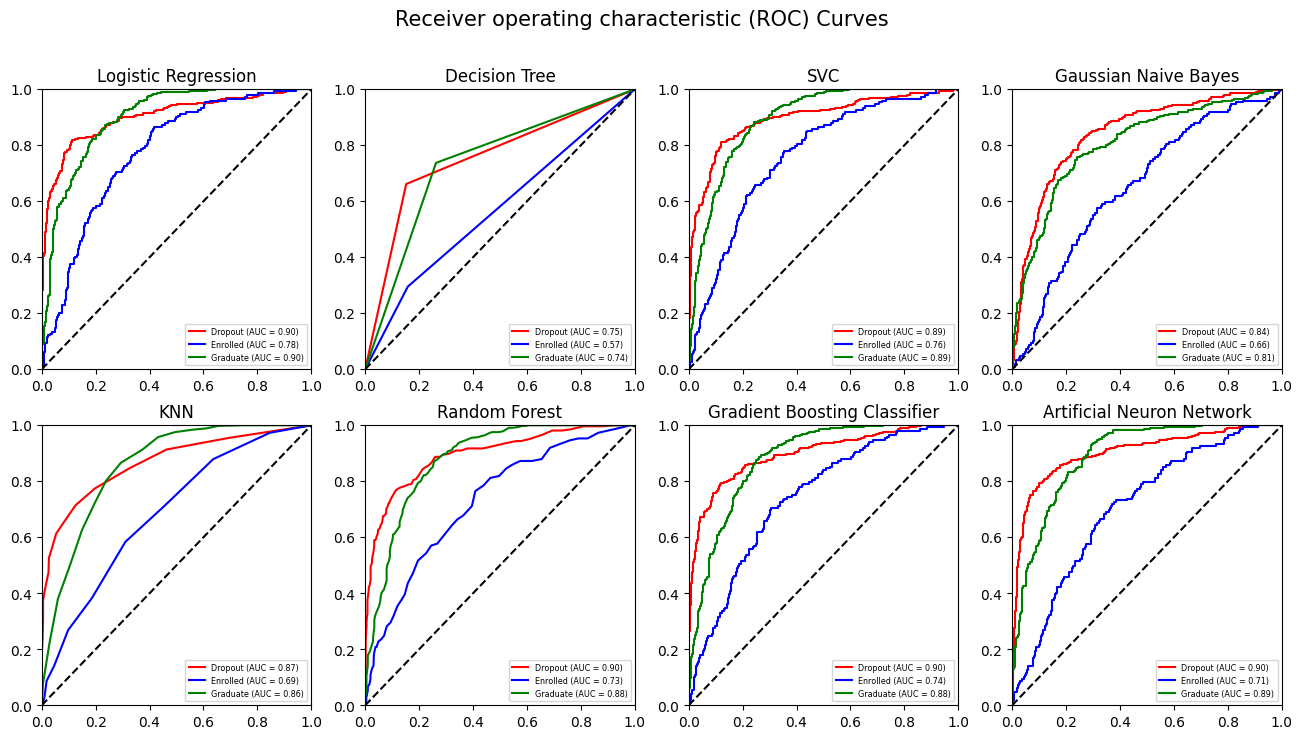

In [500]:
plt.figure(figsize=(16, 8))
plt.suptitle("Receiver operating characteristic (ROC) Curves", fontsize=15)

# Logistic Regression
y_scores = log_reg.predict_proba(X_test)
plt.subplot(2, 4, 1)
plot_roc_curve(y_test, y_scores, "Logistic Regression")

# Decision Tree
y_scores = decision_tree.predict_proba(X_test)
plt.subplot(2, 4, 2)
plot_roc_curve(y_test, y_scores, "Decision Tree")

# SVC
y_scores = svc.predict_proba(X_test)
plt.subplot(2, 4, 3)
plot_roc_curve(y_test, y_scores, "SVC")

# Gaussian Naive Bayes
y_scores = gaussian.predict_proba(X_test)
plt.subplot(2, 4, 4)
plot_roc_curve(y_test, y_scores, "Gaussian Naive Bayes")

# KNN
y_scores = knn.predict_proba(X_test)
plt.subplot(2, 4, 5)
plot_roc_curve(y_test, y_scores, "KNN")

# Random Forest
y_scores = random_forest.predict_proba(X_test)
plt.subplot(2, 4, 6)
plot_roc_curve(y_test, y_scores, "Random Forest")

# Gradient Boosting Classifier
y_scores = gbc.predict_proba(X_test)
plt.subplot(2, 4, 7)
plot_roc_curve(y_test, y_scores, "Gradient Boosting Classifier")

# Neuron Network
y_scores = ann.predict(X_test)
plt.subplot(2, 4, 8)
plot_roc_curve(y_test, y_scores, "Artificial Neuron Network")

plt.show()

The ROC-AUC curves can provide additional insights into the performance of the models beyond the accuracy scores.
A higher AUC score indicates a better separation between the positive and negative classes, which means the model is better at distinguishing between the classes. 

- From the ROC-AUC scores, it appears that the Gradient Boosting Classifier, SVC, and Random Forest models are performing better than the other models. 
- The ANN and Logistic Regression models have moderate performance 
- While the KNN, Gaussian Naive Bayes, and Decision Tree models have relatively poor performance.

## Accuracy Comparison

In [502]:
results = pd.DataFrame({
    'Models': [
        'Logistic Regression',
        'Decision Tree',
        'SVC',
        'Gaussian Naive Bayes',
        'KNN',
        'Random Forest',
        'Gradient Boosting Classifier',
        'Artificial Neuron Network'
    ],
    'Training Set Score': [
        acc_log_reg_train, 
        acc_decision_tree_train,
        acc_svc_train,
        acc_gaussian_train,
        acc_knn_train,
        acc_random_forest_train,
        acc_gbc_train,
        acc_ann_train
        
    ],
    'Test Set Score': [
        acc_log_reg_test,         
        acc_decision_tree_test,
        acc_svc_test,
        acc_gaussian_test,
        acc_knn_test,
        acc_random_forest_test,
        acc_gbc_test,
        acc_ann_test
    ]
}).sort_values('Test Set Score', ascending=False)

results.set_index("Models")

,Training Set Score,Test Set Score
Models,,
Artificial Neuron Network,78.13,74.88
Gradient Boosting Classifier,86.56,74.07
SVC,83.66,73.84
Random Forest,100.00,73.84
Logistic Regression,77.26,73.73
KNN,75.96,71.18
Gaussian Naive Bayes,66.63,65.39
Decision Tree,100.00,63.77


## Summary

- Based on the provided training and test set scores, the Gradient Boosting Classifier has really high training set score (86.56%) and the Random Forest has a perfect training score (100%). However, the test set score of the Random Forest is only 73.84%. 
- This suggests that the Random Forest model may be overfitting on the training data and not generalizing well to new, unseen data.
- The model with the highest test set score is the ANN with a score of 74.88%, followed closely by the Gradient Boosting Classifier with a score of 74.07%. 
- This indicates that these models may be better at generalizing to new data compared to the other models.
- However, it is important to consider other factors such as the computational complexity and interpretability of the models in addition to their performance on the test set.